## Baca Data

In [1]:
# Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Membaca dataset
customer_data = pd.read_csv('customer-data.csv')

In [60]:
# Informasi tipe dataset
print(customer_data.dtypes)

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object


In [61]:
# Liat NA
missing_na = pd.isnull(customer_data).sum()
print(missing_na)

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64


In [62]:
# bikin kolom baru 'claim_rate' berdasarkan kolom 'outcome'
customer_data['claim_rate'] = np.where(customer_data['outcome']==True,1,0)

## Mengolah Data Children

In [63]:
# Mengubah tipe data kolom 'postal_code' menjadi kategori
customer_data['children'] = customer_data['children'].astype('str')
print(customer_data.dtypes['children'])

object


In [74]:
tabel_1 = pd.crosstab(customer_data['children'], customer_data['outcome'])
tabel_1

outcome,False,True
children,,
False,1637,1475
True,5230,1658


Client yang memiliki anak dan berpotensi untuk mengajukan claim sebanyak 1658 (16.58%)

Client yang memiliki anak dan berpotensi untuk tidak mengajukan claim sebanyak 5230 (52.3%)

## Mengolah Postal Code

In [65]:
# Mengubah tipe data kolom 'postal_code' menjadi kategori
customer_data['postal_code'] = customer_data['postal_code'].astype('str')
print(customer_data.dtypes['postal_code'])


object


In [75]:
tabel_2 = pd.crosstab(customer_data['postal_code'], customer_data['outcome'])
tabel_2

outcome,False,True
postal_code,,
10238,5054,1886
21217,0,120
32765,1529,927
92101,284,200


[Text(0.5, 1.0, 'Claim Probability by Living Area'),
 Text(0, 0.5, 'Claim Probability'),
 Text(0.5, 0, 'Postal Code')]

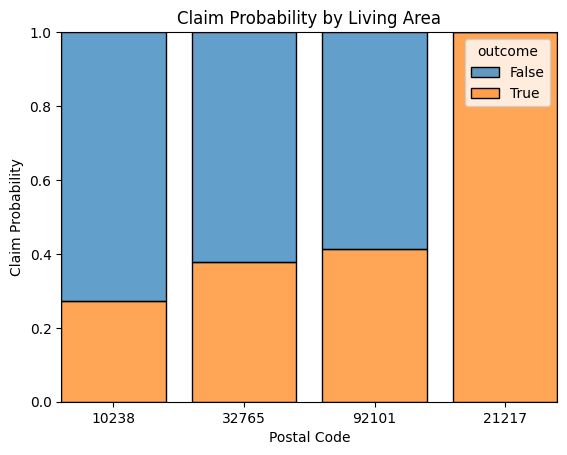

In [67]:
ax=sns.histplot(customer_data, x='postal_code', hue='outcome',stat='probability', multiple='fill', shrink=.8,alpha=0.7)
ax.set(title='Claim Probability by Living Area',ylabel='Claim Probability',xlabel='Postal Code')

## Hubungan Antar Variabel

In [76]:
tabel_3 = pd.crosstab(customer_data['postal_code'], customer_data['children'])
tabel_3

children,False,True
postal_code,,
10238,2210,4730
21217,33,87
32765,731,1725
92101,138,346


In [80]:
tabel_1


outcome,False,True
children,,
False,1637,1475
True,5230,1658


In [81]:
tabel_2


outcome,False,True
postal_code,,
10238,5054,1886
21217,0,120
32765,1529,927
92101,284,200


In [82]:
tabel_3

children,False,True
postal_code,,
10238,2210,4730
21217,33,87
32765,731,1725
92101,138,346


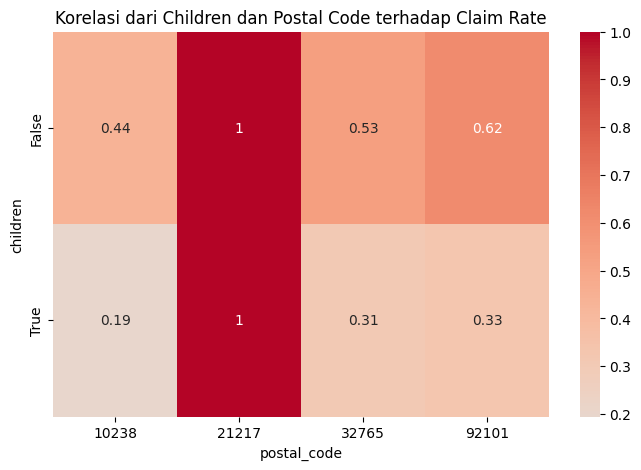

In [69]:
# Membuat pivot table untuk children dan postal_code terhadap claim_rate
children_postalcode = pd.pivot_table(data=customer_data, index='children',columns='postal_code',values='claim_rate',aggfunc='mean')

# Membuat heatmap untuk children dan postal_code terhadap claim_rate
plt.figure(figsize=[8,5])
sns.heatmap(children_postalcode,annot=True,cmap='coolwarm',center=0.117)
plt.title('Korelasi dari Children dan Postal Code terhadap Claim Rate')
plt.show()


## Coba-Coba Kredit Score

In [70]:
# Previous data preparation

# Input missing values with mean credit score for each income group
def input_creditscore(income_classes):
    for income_class in income_classes:      
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class
        
        # calculate the mean for each income group
        mean = customer_data[customer_data['income'] == income_class]['credit_score'].mean()
        
        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,"credit_score"] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = customer_data['income'].unique()
input_creditscore(income_groups)

In [71]:
customer_data['credit_score']

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: credit_score, Length: 10000, dtype: float64

In [72]:
pd.isnull(customer_data['credit_score']).sum()

np.int64(0)

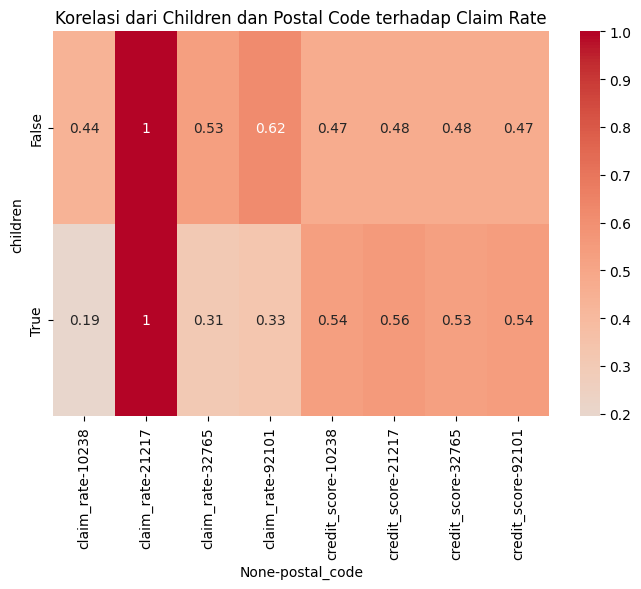

In [73]:
# Buat pivot table
pivot = pd.pivot_table(
    data=customer_data,
    index='children',
    columns='postal_code',
    values=['credit_score', 'claim_rate'],
    aggfunc='mean'
)

# Membuat heatmap untuk children dan postal_code terhadap claim_rate
plt.figure(figsize=[8,5])
sns.heatmap(pivot,annot=True,cmap='coolwarm',center=0.117)
plt.title('Korelasi dari Children dan Postal Code terhadap Claim Rate')
plt.show()